In [1]:
#YC95
#HO4

In [2]:
# HO4. Solve Problem 4.1 on page 119 of your textbook.
# We have Taken 3 and 4 Class Exercises data set used labaries


Make sure DMBA package is available

In [3]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.4 MB/s eta 0:00:00


In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

import dmba

%matplotlib inline

Colab environment detected.


In [5]:
# Loading Boston Housing data Set
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0


In [6]:
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
# A) Which variables are quantitative/numerical? Which are ordinal? Which are nominal
# Used dataset Compute principal components on two dimensions
cereals_df = dmba.load_data('Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])


PCA(n_components=2)

In [8]:
cereals_df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


A) Answer: In the Breakfast Cereals dataset, the variable can display as follows:

Quantitative/numerical Variable: There are variable that represent measurable quantities and can take on numeric values includes:
"calories", "protein",	"fat",	"sodium",	"fiber",	"carbo",	"sugars",	"potass",	"vitamins" and "shelf"

Ordinal Variables: These are categorical varibales with ranking. In the dataset "shelf"	is ordinal varibales because it's replacement of cereals datset 1 bottom to 3 top shelf.

Nominal Variable : Theses are categotical without a natural order or ranking. In the dataset "name", "mfr" and "type" are nominal varibales.  




b. Compute the mean, median, min, max, and standard deviation for each of the
quantitative variables

In [9]:
# Answer: b
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))

print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.613523557312254
Std. dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


In [10]:
# Categorical Standard summaries: mean, median, max, len
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


c. Plot a histogram for each of the quantitative variables.Based on the histograms and

summary statistics, answer the following questions:

i. Which variables have the largest variability?

ii. Which variables seem skewed?

iii. Are there any values that seem extreme?

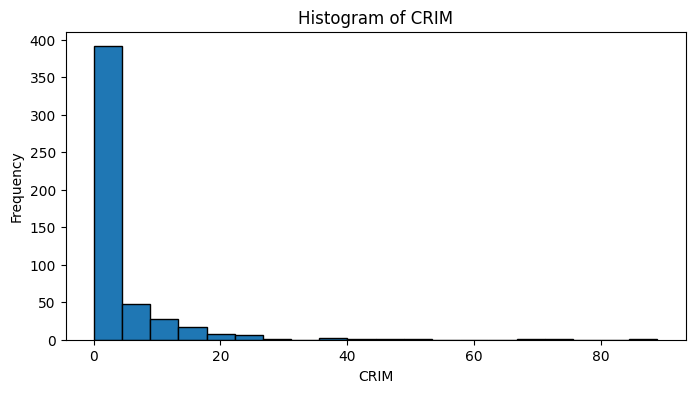

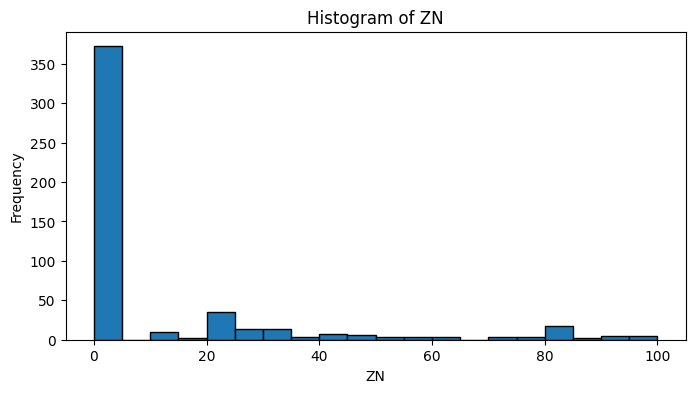

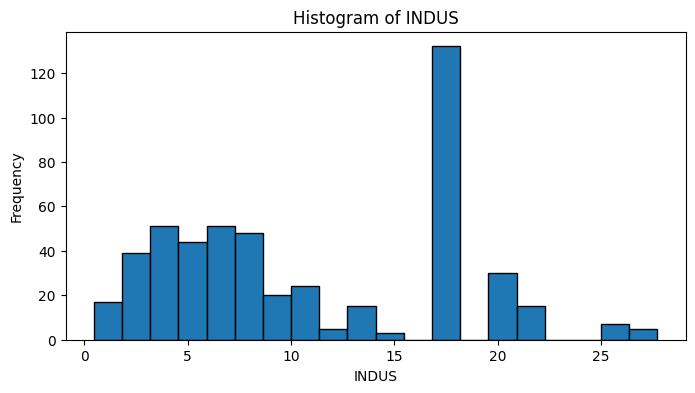

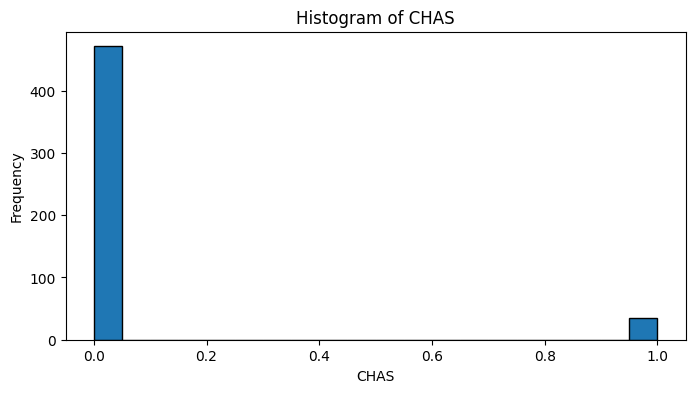

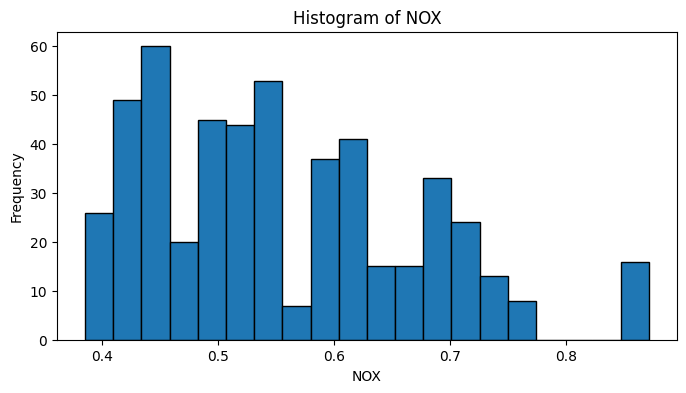

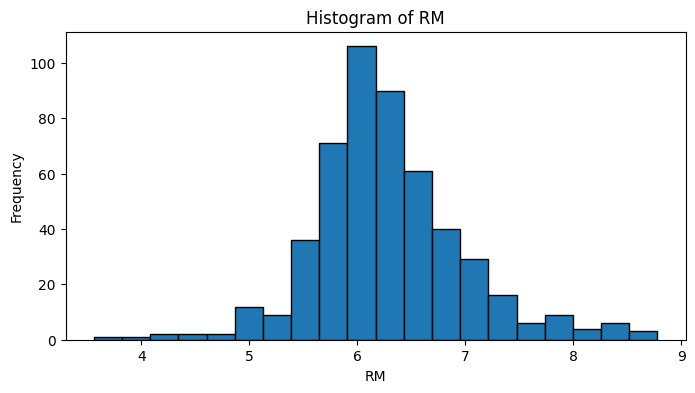

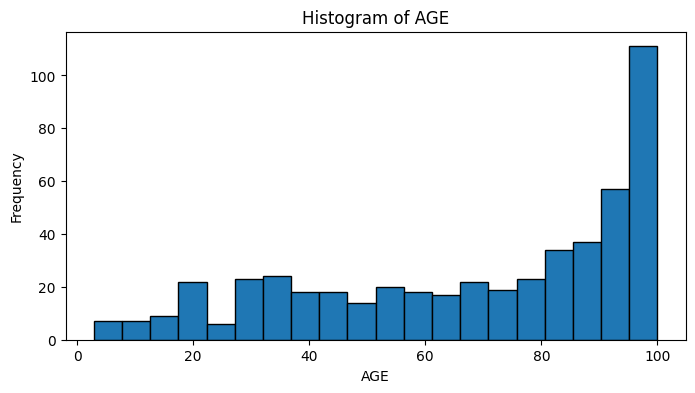

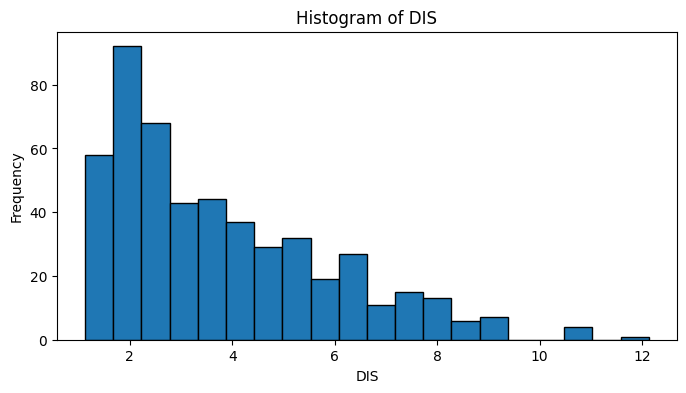

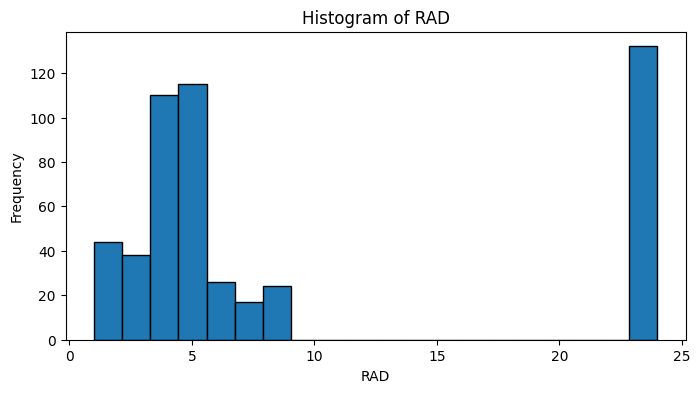

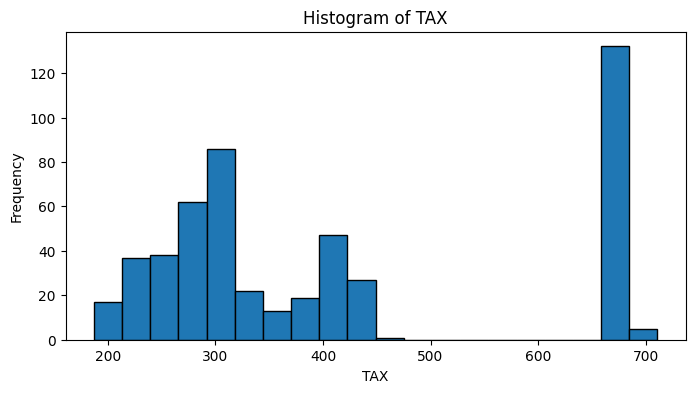

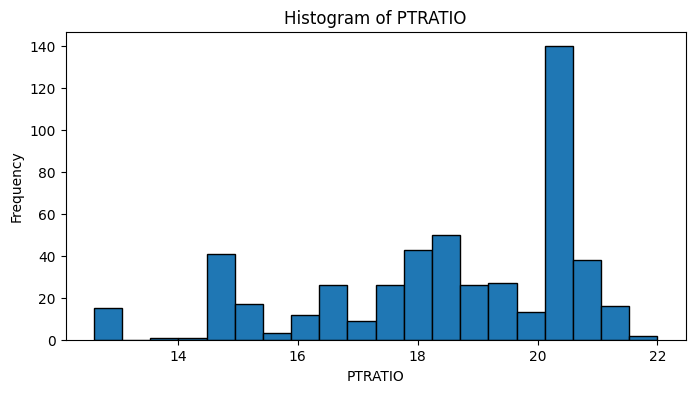

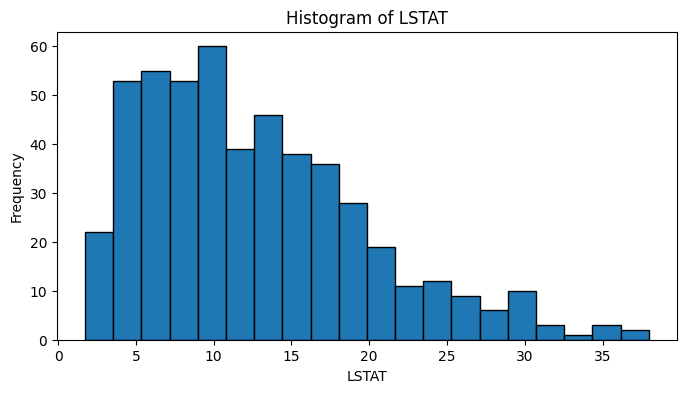

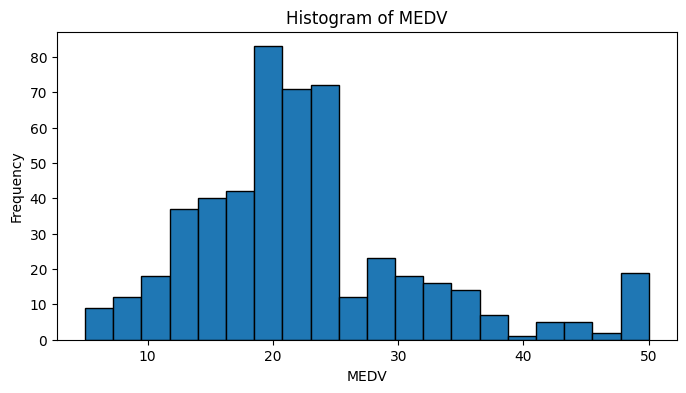

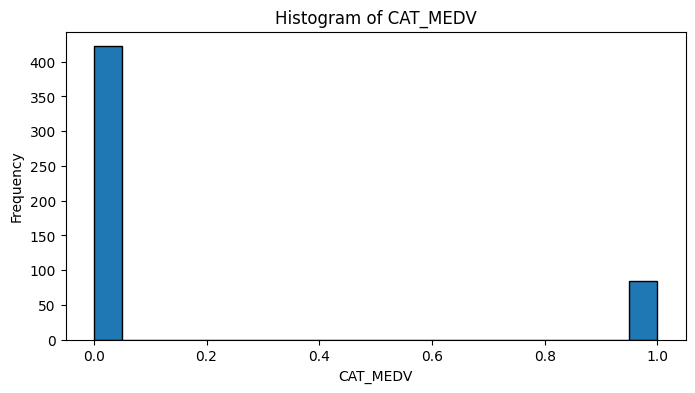

In [11]:
# Answer: C
# import matplotlib.pyplot as plt
# Plot histograms for each quantitative variable
for var in bostonHousing_df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(bostonHousing_df[var], bins=20, edgecolor='k')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# I can also use summary_stats from part C for 1,2,3 to answer the questions.


d. Plot a side-by-side boxplot comparing the calories in hot vs. cold cereals. What
does this plot show us?

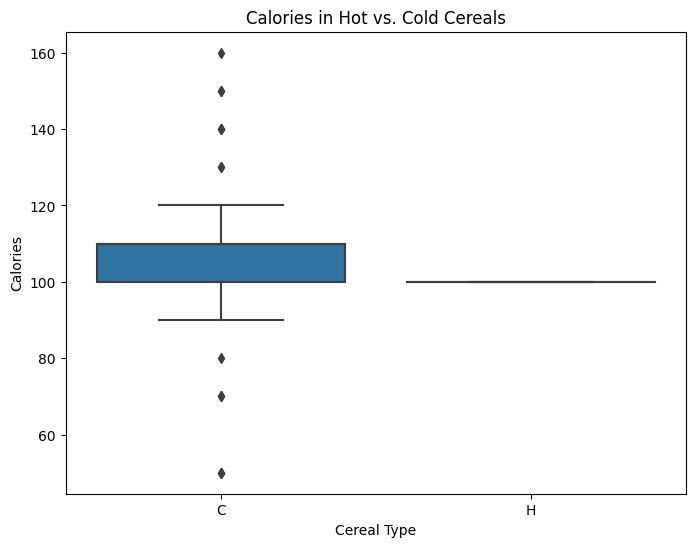

In [23]:
# Answer: d
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot comparing calories in hot vs. cold cereals
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='calories', data=cereals_df)
plt.title('Calories in Hot vs. Cold Cereals')
plt.xlabel('Cereal Type')
plt.ylabel('Calories')
plt.show()




e. Plot a side-by-side boxplot of consumer rating as a function of the shelf height. If
we were to predict consumer rating from shelf height, does it appear that we need
to keep all three categories of shelf height?

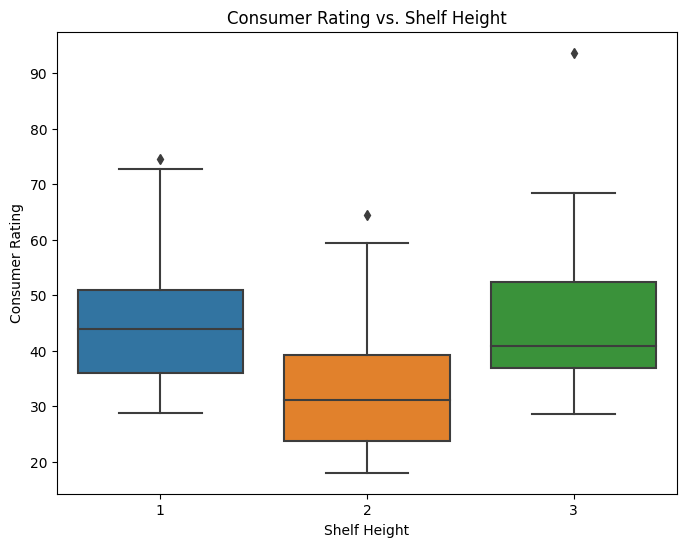

In [25]:
# Answer: E
# Create a boxplot of consumer rating vs. shelf height
plt.figure(figsize=(8, 6))
sns.boxplot(x='shelf', y='rating', data=cereals_df)
plt.title('Consumer Rating vs. Shelf Height')
plt.xlabel('Shelf Height')
plt.ylabel('Consumer Rating')
plt.show()


f. Compute the correlation table for the quantitative variable (method corr()). In addition,
generate a matrix plot for these variables (see Table 3.4 on how to do this using
the seaborn library).

i. Which pair of variables is most strongly correlated?

ii. How can we reduce the number of variables based on these correlations?

iii. How would the correlations change if we normalized the data first?

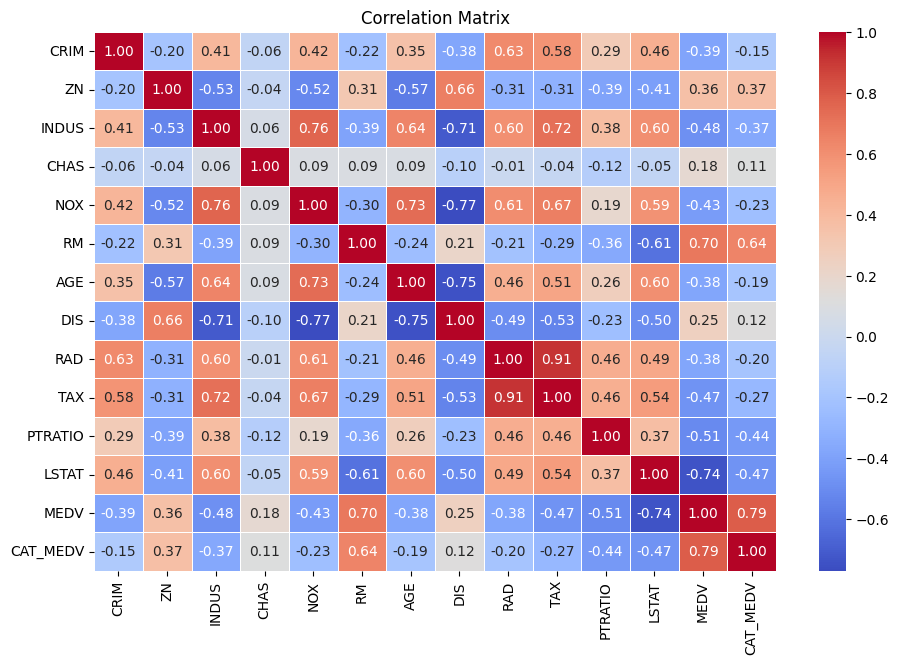

(i) Pair of variables with the highest absolute correlation: ('ZN', 'ZN')


In [26]:
# Answer: F
# Compute the correlation matrix
correlation_matrix = bostonHousing_df.corr()

# Generate a matrix plot using seaborn
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# (i) Find the pair of variables with the highest absolute correlation
max_corr_pair = correlation_matrix.abs().unstack().sort_values(ascending=False).index[1]
print(f"(i) Pair of variables with the highest absolute correlation: {max_corr_pair}")

# (ii) To reduce the number of variables, you can consider removing one variable from strongly correlated pairs.
# (iii) Normalizing the data may affect the correlations, especially if the variables have different scales.

# This code above computing the correlation matrix for the quantitative varibales and generating a heatmap to visualize the
# Correlations is Identify the pair of variable with the heighest assess the possibility of reducing variable based on
# these correlations



g. Consider the first PC of the analysis of the 13 numerical variables in Table 4.12.
Describe briefly what this PC represents.

In [30]:
# Answer: g  and Used for Table 4.12
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
'Proportion of variance': pcs.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [31]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899,0.255906,0.025595,-0.002477,0.029909,0.499532
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749,-0.120752,-0.282705,-0.426632,0.534718,-0.021566
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893,-0.347967,0.051155,0.063050,-0.459688,-0.145087
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364,-0.664372,0.283703,0.176720,0.215103,-0.001091
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119,-0.064244,-0.112325,0.216216,-0.244333,0.295107
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743,0.326393,0.260468,0.167436,-0.116807,0.240557
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872,0.152082,-0.227985,-0.063088,0.225384,0.251659
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360,-0.025154,-0.148808,0.262222,-0.166513,0.177221
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287,-0.129486,-0.294276,-0.457041,-0.346151,0.052295
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101,0.052044,0.174834,0.414146,0.416199,-0.046102


In [32]:
# I try to another way
# first PC of the analysis of the 13 numerical variables
# from sklearn.decomposition import PCA

# Fit PCA to the quantitative variables
pca = PCA()
pca.fit(bostonHousing_df)

# Access the first PC and its components
first_pc = pca.components_[0]

# Describe what the first PC represents
print("Description of the First Principal Component:")
for i, var_name in enumerate(bostonHousing_df.columns):
    print(f"PC1 loading for {var_name}: {first_pc[i]:.4f}")


# The First principle componets(PC1) represent a linear combinations of the original varibales
# The loading coefficients for each variables indicate strong variable contributes to PC1.PC1 captures the derection.
# in the feature space along which the data varies the most by examing the loading.
# Pvariations insights into the most significant patterns and variantions in the datset.


Description of the First Principal Component:
PC1 loading for CRIM: 0.0296
PC1 loading for ZN: -0.0449
PC1 loading for INDUS: 0.0294
PC1 loading for CHAS: -0.0001
PC1 loading for NOX: 0.0005
PC1 loading for RM: -0.0012
PC1 loading for AGE: 0.0863
PC1 loading for DIS: -0.0068
PC1 loading for RAD: 0.0467
PC1 loading for TAX: 0.9926
PC1 loading for PTRATIO: 0.0059
PC1 loading for LSTAT: 0.0232
PC1 loading for MEDV: -0.0257
PC1 loading for CAT_MEDV: -0.0006


In [34]:
# Thanks
# ADTA 5230 Chapter 3 Class Exercises
# ADTA 5230 Chapter 4 Class Exercises